In [92]:
import numpy as np
import  matplotlib.pyplot as plt
import scipy.special as sp

In [93]:
def mod(bits):
    #mapping
    return 2*bits-1

no_of_users=2
no_of_bits=4
msg_bits1=np.random.randint(0, 2, (no_of_users,no_of_bits))
# print(msg_bits1)


# mod_bits=mod(msg_bits1)
# print(mod_bits)

In [94]:
def awgn(bits, snr_db):
    # print("symbols\n",bits)
    v_sum=np.sum(bits,axis=0)
    # print("v_sum\n",v_sum)

    snr_linear = 10**(snr_db / 10.0)
    # print("snr_lin\n",snr_linear)
    noise_variance = 1 / (2 * snr_linear)
    noise = np.sqrt(noise_variance) * (np.random.randn(len(v_sum)))
    # print("noise\n",noise)
    return v_sum + noise



# snr_db_range =1  # SNR range from 0 dB to 12 dB
# #theoritical ber vs snr
# snr=10**(snr_db_range / 10)
# print(snr)

# channel_op=awgn(mod_bits,snr_db_range)
# print("channel_op\n",channel_op)

In [95]:
def demod(received_signal):
    symbols = {
        2: (1,1),
        0:(0,1),
        -2:(0,0)
    }

    #demodulation
    demodulated_bits=np.array([])
    for i in received_signal:
        closest_symbol = min(symbols.keys(), key=lambda s: np.abs(i - s))
        demodulated_bits=np.append(demodulated_bits,(symbols[closest_symbol]))
    #    print(np.array(demodulated_bits))

    received_signal1=np.array([int(i)  for i in demodulated_bits])
    #converting into int just for appearance
    return received_signal1
# demod_bits=demod(channel_op)
# print("demod",demod_bits)

In [96]:
def calculate_ber(msg,rec,no_of_users,no_of_bits):
    a1=msg.ravel()
    # print(a1)
    n = len(a1)
    for i in range(0, n, 2):
        if i + 1 < n:  # Ensure index does not go out of bounds
            if (a1[i], a1[i+1]) == (1, 0):
                a1[i], a1[i+1] = 0, 1  # Update values in array a1


    # return er
    # print(a1)
    # print(rec)
    ber=np.sum(a1!=rec)/(no_of_users*no_of_bits)
    return ber 
# BER=calculate_ber(msg_bits1,demod_bits,no_of_users,no_of_bits)
# print(BER)

In [97]:
def simulate(snr_db_range, msg_bits,no_of_users,no_of_bits):
    ber = []
    #ser:=symbol error rate

    for snr_db in snr_db_range:
        # Modulation        symbols-->bitsy])
        transmitted_symbols =mod(msg_bits)
        
        #channel output = bits+noie
        received_symbols = awgn(transmitted_symbols,snr_db)
        
        # Demodulate the received signal        noisy_bits-->symbols
        demodulated_symbols =demod(received_symbols)
        
        # Calculate BER
        ber.append(calculate_ber(msg_bits, demodulated_symbols,no_of_users,no_of_bits))
        
    return ber


In [98]:
no_of_users=2
no_of_bits=10000
msg_bits1=np.random.randint(0, 2, (no_of_users,no_of_bits))
# print(msg_bits1)



snr_db_range = np.arange(0,12, 1)  # SNR range from 0 dB to 12 dB
#theoritical ber vs snr
snr=10**(snr_db_range / 10)
# print(snr)



res=simulate(snr_db_range,msg_bits1,no_of_users,no_of_bits)
print("res\n",res)
# bpsk_simulated= calculate_ber(snr_db_range, msg_bits1)


res
 [0.38155, 0.4076, 0.40515, 0.40525, 0.40545, 0.4055, 0.40575, 0.4057, 0.40575, 0.4058, 0.4058, 0.4058]


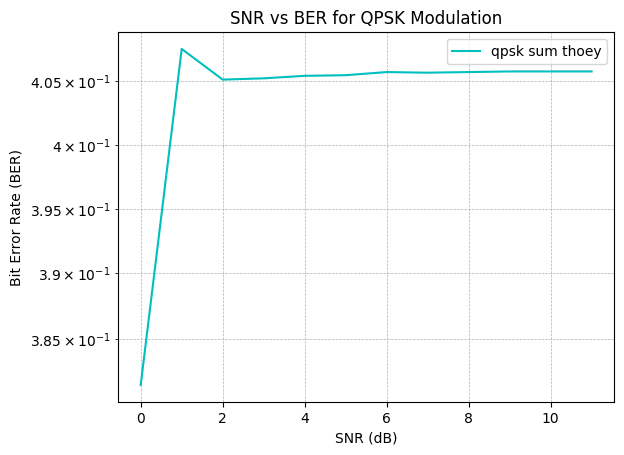

In [99]:

plt.semilogy(snr_db_range, res,  linestyle='-', color="c", label='qpsk sum thoey')
# plt.semilogy(snr_db_range, qpsk_sum_simulated,  linestyle='--', color='c', label='qpsk sum simulated')


plt.legend()
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('SNR vs BER for QPSK Modulation')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()